----- Import all library functions-----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---Read the dataset---

In [2]:
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

--- Display the dataset---

In [3]:
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


--- Cleaning of the dataset ---

In [4]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

<AxesSubplot:>

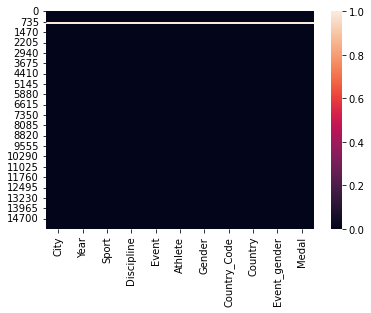

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.dropna(axis=0,inplace=True)

<AxesSubplot:>

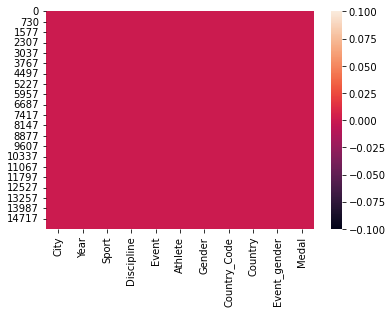

In [7]:
sns.heatmap(df.isnull())

--- Information of the dataset---

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


---Change the type of the Year column--

In [9]:
df['Year']=df['Year'].astype('int')

--- Number of Countries in the dataset ---

In [10]:
df['Country'].nunique()

127

--- Number of Different Sport in the Dataset ---

In [11]:
df['Sport'].nunique()

28

--- Number of different Events in the Dataset ---

In [12]:
df['Event'].nunique()

293

--- Yearly wise Total Number of Medal count ---

In [13]:
df.groupby('Year')['Medal'].count().sort_values(ascending=False).head(20)

Year
2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
Name: Medal, dtype: int64

--- Total number of Medals based on their catagory ---

In [14]:
df.groupby('Medal')['Medal'].count()

Medal
Bronze    5258
Gold      5042
Silver    5016
Name: Medal, dtype: int64

--- Country wise Total Medal count ---

In [15]:
total_medals_by_country=df.groupby('Country')['Medal'].count().sort_values(ascending=False).head(20)
total_medals_by_country

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Korea, South       454
France             449
Netherlands        428
Japan              388
Hungary            368
Cuba               349
West Germany       345
Spain              328
Brazil             318
Canada             304
Name: Medal, dtype: int64

--- Sub Table to get the excat count each type of medal based on Country and year ---

In [16]:
medal_counts = df.groupby(['Country', 'Year', 'Medal']).size().unstack(fill_value=0)
medal_counts

Medal             Bronze  Gold  Silver
Country     Year                      
Afghanistan 2008       1     0       0
Algeria     1984       2     0       0
            1992       1     1       0
            1996       1     2       0
            2000       3     1       1
...                  ...   ...     ...
Zambia      1984       1     0       0
            1996       0     0       1
Zimbabwe    1980       0    16       0
            2004       1     1       1
            2008       0     1       3

[559 rows x 3 columns]

--- Graphical representation of the medals won by United State over the years ---

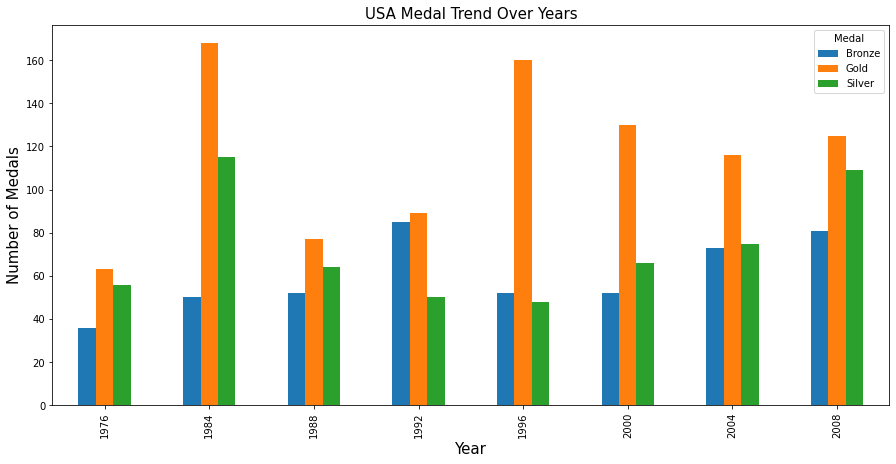

In [17]:

usa_medal_trend = medal_counts.loc['United States']
usa_medal_trend.plot(figsize=(15,7),kind='bar')
plt.title('USA Medal Trend Over Years',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Medals',fontsize=15)
plt.show()

--- Gold Medals count based on the country ---

In [18]:
gold_medals_by_country = df[df['Medal'] == 'Gold'].groupby('Country')['Medal'].count().sort_values(ascending=False)
gold_medals_by_country

Country
United States    928
Soviet Union     439
East Germany     286
Germany          237
China            234
                ... 
Panama             1
Burundi            1
Suriname           1
Colombia           1
Tunisia            1
Name: Medal, Length: 87, dtype: int64

--- Gold Medal ratio of the each country ---

In [19]:
medal_ratios = df.groupby(['Country', 'Medal']).size().unstack(fill_value=0)
medal_ratios['Total'] = medal_ratios.sum(axis=1)
medal_ratios['Gold_Ratio'] = medal_ratios['Gold'] / medal_ratios['Total']
medal_ratios = medal_ratios.sort_values(by='Gold_Ratio', ascending=False)
medal_ratios

Medal,Bronze,Gold,Silver,Total,Gold_Ratio
Country,,,,,
Burundi,0,1,0,1,1.000000
Panama,0,1,0,1,1.000000
United Arab Emirates,0,1,0,1,1.000000
Cameroon,1,20,0,21,0.952381
Zimbabwe,1,18,4,23,0.782609
...,...,...,...,...,...
Qatar,2,0,0,2,0.000000
Saudi Arabia,1,0,1,2,0.000000
Senegal,0,0,1,1,0.000000


--- Top 10 countries by total Medal count --- 

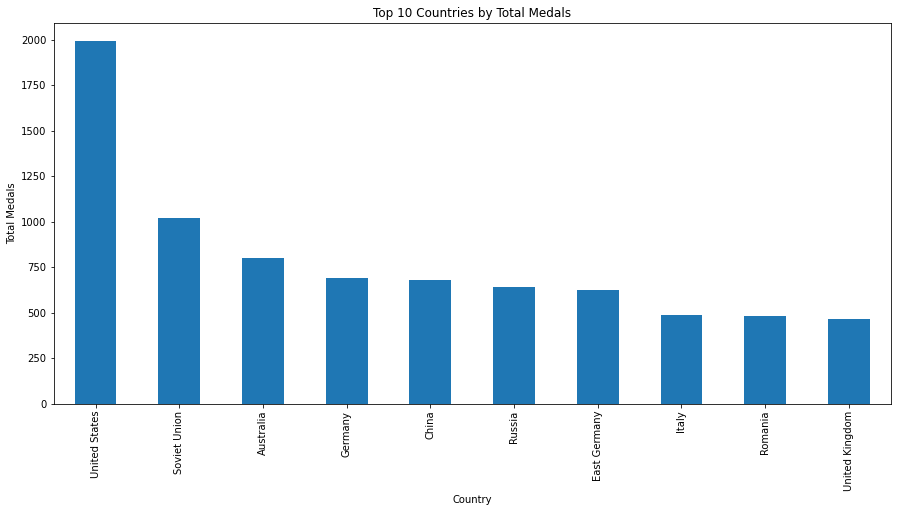

In [20]:
top_10_total = total_medals_by_country.head(10)
top_10_total.plot(figsize=(15,7),kind='bar', title='Top 10 Countries by Total Medals')
plt.ylabel('Total Medals')
plt.show()

--- Top 10 countries by total gold medal count ---

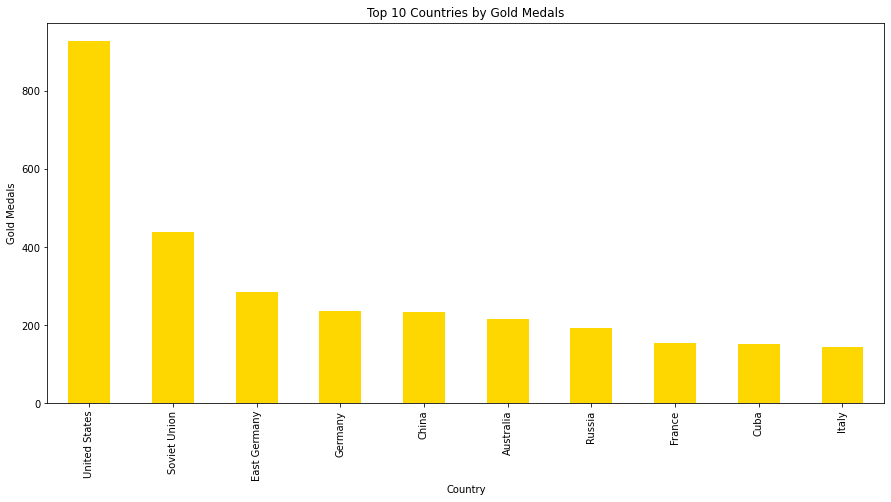

In [21]:
top_10_gold = gold_medals_by_country.head(10)
top_10_gold.plot(figsize=(15,7),kind='bar', color='gold', title='Top 10 Countries by Gold Medals')
plt.ylabel('Gold Medals')
plt.show()

--- Total medal won by each Athlete ---

In [22]:
total_medals_by_athlete = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
total_medals_by_athlete

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
NEMOV, Alexei          12
TORRES, Dara           12
THOMPSON, Jenny        12
                       ..
JAANSON, Jueri          1
JAANSON, Juri           1
JABLKOWSKI, Piotr       1
JABRAILOV, Elmadi       1
ÖRSTED, Hans-Henrik     1
Name: Medal, Length: 11337, dtype: int64

--- Tabular representation of medal category won by each Athlete ---

In [23]:
medal_breakdown_by_athlete = df.groupby(['Athlete', 'Medal']).size().unstack(fill_value=0)
medal_breakdown_by_athlete['Total'] = medal_breakdown_by_athlete.sum(axis=1)
medal_breakdown_by_athlete

Medal,Bronze,Gold,Silver,Total
Athlete,,,,
"AAMODT, Ragnhild",0,1,0,1
"AARDENBURG, Willemien",1,0,0,1
"AARDEWIJN, Pepijn",0,0,1,1
"AARONES, Ann Kristin",1,0,0,1
"ABAJO, Jose Luis",1,0,0,1
...,...,...,...,...
"ZYCH, Boguslaw",1,0,0,1
"ZYKINA, Olesya",1,0,1,2
"ZÜHLKE, Steffen",1,0,0,1


In [24]:
top_athletes_by_total = medal_breakdown_by_athlete.sort_values(by='Total', ascending=False)
top_athletes_by_total

Medal,Bronze,Gold,Silver,Total
Athlete,,,,
"PHELPS, Michael",2,14,0,16
"FISCHER, Birgit",0,8,4,12
"NEMOV, Alexei",6,4,2,12
"TORRES, Dara",4,4,4,12
"THOMPSON, Jenny",1,8,3,12
...,...,...,...,...
"JAANSON, Jueri",0,0,1,1
"JAANSON, Juri",0,0,1,1
"JABLKOWSKI, Piotr",0,0,1,1


In [25]:
top_athletes_by_gold = medal_breakdown_by_athlete.sort_values(by='Gold', ascending=False)
top_athletes_by_gold

Medal,Bronze,Gold,Silver,Total
Athlete,,,,
"PHELPS, Michael",2,14,0,16
"LEWIS, Carl",0,9,1,10
"BIONDI, Matthew",1,8,2,11
"THOMPSON, Jenny",1,8,3,12
"FISCHER, Birgit",0,8,4,12
...,...,...,...,...
"KANEVSKY, Giselle",1,0,0,1
"KANEKO, Makoto",1,0,0,1
"KANCSAL, Tamas",1,0,0,1


--- Graphical representation of top 10 Athletes ---

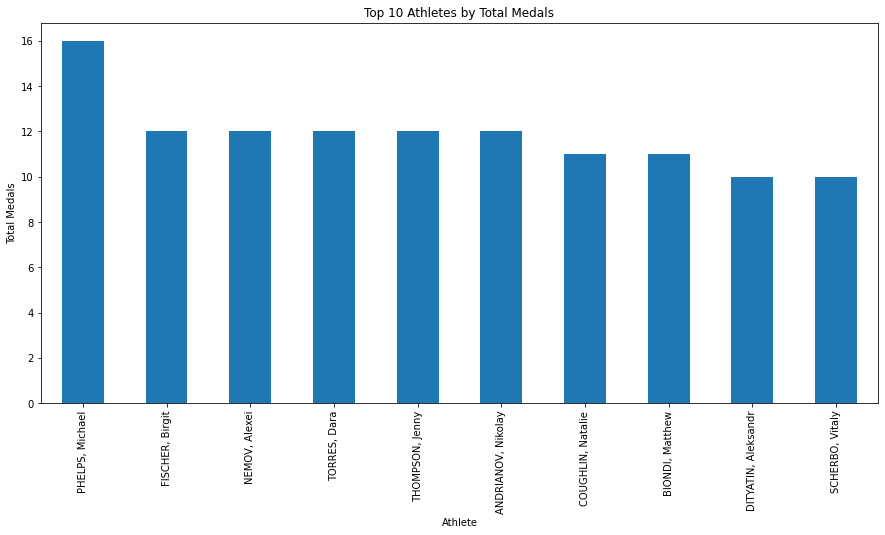

In [26]:
top_10_athletes_total = top_athletes_by_total.head(10)
top_10_athletes_total['Total'].plot(figsize=(15,7),kind='bar', title='Top 10 Athletes by Total Medals')
plt.ylabel('Total Medals')
plt.show()

--- Top 10 Athletes by Gold medal count ---

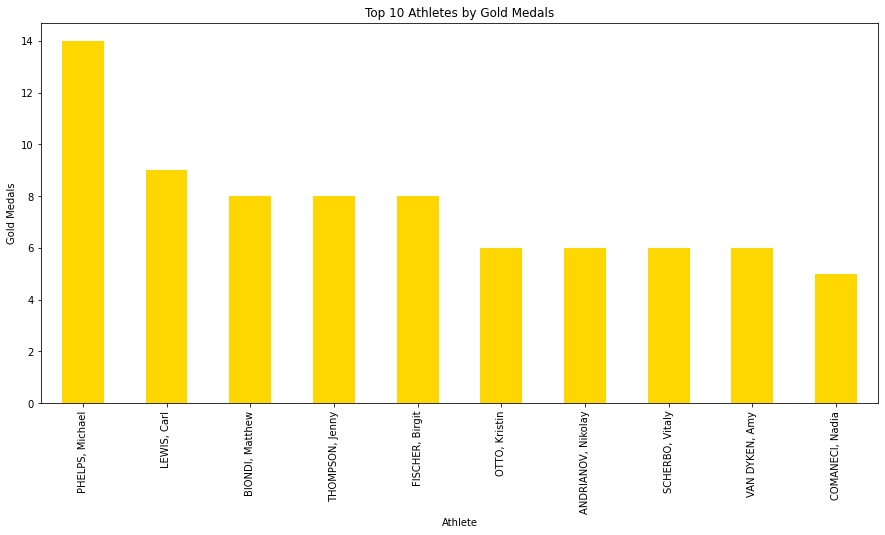

In [27]:
top_10_athletes_gold = top_athletes_by_gold.head(10)
top_10_athletes_gold['Gold'].plot(figsize=(15,7),kind='bar', color='gold', title='Top 10 Athletes by Gold Medals')
plt.ylabel('Gold Medals')
plt.show()

--- Top 5 Athletes based on their participation and their medal count---

In [28]:
years_participated = df.groupby('Athlete')['Year'].nunique()
athlete_performance = pd.merge(top_athletes_by_total, years_participated, on='Athlete')
athlete_performance.rename(columns={'Year': 'Olympics_Participated'}, inplace=True)
athlete_performance = athlete_performance.sort_values(by=['Olympics_Participated', 'Total'], ascending=[False, False])
athlete_performance.head()

,Bronze,Gold,Silver,Total,Olympics_Participated
Athlete,,,,,
"FISCHER, Birgit",0,8,4,12,6
"LIPA, Elisabeta",1,5,2,8,6
"TORRES, Dara",4,4,4,12,5
"OTTEY-PAGE, Merlene",6,0,3,9,5
"SAUTIN, Dmitry",4,2,2,8,5


--- Total Medal count based on Gender ---

In [29]:
total_medals_by_gender = df.groupby('Gender')['Medal'].count()
total_medals_by_gender


Gender
Men      9388
Women    5928
Name: Medal, dtype: int64

--- Total Gold Medal count based on Gender ---

In [30]:
gold_medals_by_gender = df[df['Medal'] == 'Gold'].groupby('Gender')['Medal'].count()
gold_medals_by_gender

Gender
Men      3080
Women    1962
Name: Medal, dtype: int64

--- Graphical representation of the Total Medal count based on Gender ---

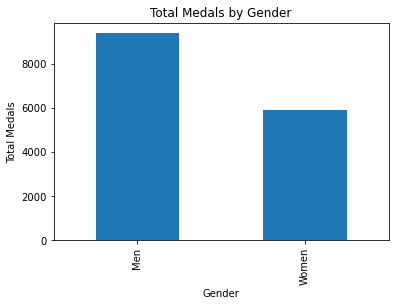

In [31]:
total_medals_by_gender.plot(kind='bar', title='Total Medals by Gender')
plt.ylabel('Total Medals')
plt.show()

--- Graphical representation of the Total Gold Medal count based on Gender ---

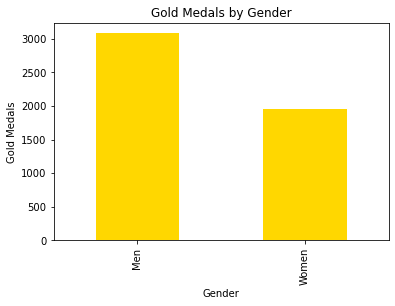

In [32]:
gold_medals_by_gender.plot(kind='bar', color='gold', title='Gold Medals by Gender')
plt.ylabel('Gold Medals')
plt.show()

--- Sports wise Medal count ---

In [33]:
medals_by_sport = df.groupby('Sport')['Medal'].count().sort_values(ascending=False)
medals_by_sport

Sport
Aquatics             2210
Athletics            1523
Rowing               1377
Hockey                817
Gymnastics            783
Handball              780
Volleyball            695
Canoe / Kayak         672
Football              669
Basketball            646
Fencing               606
Wrestling             533
Cycling               483
Equestrian            423
Sailing               417
Boxing                416
Judo                  396
Shooting              345
Baseball              335
Weightlifting         311
Softball              180
Archery               162
Badminton             120
Table Tennis          120
Tennis                118
Modern Pentathlon      81
Taekwondo              80
Triathlon              18
Name: Medal, dtype: int64

--- Medal count based on sport and event ---

In [34]:
medals_by_event = df.groupby(['Sport', 'Event'])['Medal'].count().sort_values(ascending=False)
medals_by_event

Sport          Event                           
Hockey         hockey                              817
Handball       handball                            780
Football       football                            669
Volleyball     volleyball                          647
Basketball     basketball                          646
                                                  ... 
Sailing        board (windglider)                    3
Weightlifting  54 - 59kg, total (bantamweight)       3
               56kg                                  3
               59 - 64kg, total (featherweight)      3
               99 - 108kg, total (heavyweight)       3
Name: Medal, Length: 303, dtype: int64

--- Medal count based on sports of each country ---

In [35]:
medals_by_sport_country = df.groupby(['Sport', 'Country'])['Medal'].count().unstack(fill_value=0)
medals_by_sport_country

Country,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Barbados,Belarus,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands*,West Germany,Yugoslavia,Zambia,Zimbabwe
Sport,,,,,,,,,,,,,,,,,,,,,
Aquatics,0,0,1,0,239,3,0,0,0,0,...,578,0,0,1,0,0,44,50,0,7
Archery,0,0,0,0,2,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0
Athletics,0,6,0,0,24,2,0,19,1,19,...,299,0,0,0,0,0,36,0,1,0
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baseball,0,0,0,0,24,0,0,0,0,0,...,68,0,0,0,0,0,0,0,0,0
Basketball,0,0,24,0,48,0,0,0,0,0,...,192,0,0,0,0,0,0,84,0,0
Boxing,0,6,1,1,1,0,4,0,0,2,...,42,0,6,4,0,0,3,8,1,0
Canoe / Kayak,0,0,0,0,31,1,0,0,0,10,...,10,0,0,0,0,0,4,7,0,0
Cycling,0,0,2,0,54,0,0,0,0,1,...,32,1,0,0,0,0,17,0,0,0


--- Medal count based on sports and events of each country ---

In [36]:
medals_by_event_country = df.groupby(['Sport', 'Event', 'Country'])['Medal'].count().unstack(fill_value=0)
medals_by_event_country

Country                             Afghanistan  Algeria  Argentina  Armenia  \
Sport     Event                                                                
Aquatics  100m backstroke                     0        0          0        0   
          100m breaststroke                   0        0          0        0   
          100m butterfly                      0        0          0        0   
          100m freestyle                      0        0          0        0   
          10m platform                        0        0          0        0   
...                                         ...      ...        ...      ...   
Wrestling 84 - 96kg                           0        0          0        0   
          85 - 97kg                           0        0          0        0   
          90 - 100kg (heavyweight)            0        0          0        0   
          96 - 120kg                          0        0          0        1   
          97 - 130kg                          0        0          0        0   

Country                             Australia  Austria  Azerbaijan  Bahamas  \
Sport     Event                                                               
Aquatics  100m backstroke                   2        1           0        0   
          100m breaststroke                 9        1           0        0   
          100m butterfly                    8        0           0        0   
          100m freestyle                    5        0           0        0   
          10m platform                      4        0           0        0   
...                                       ...      ...         ...      ...   
Wrestling 84 - 96kg                         0        0           1        0   
          85 - 97kg                         0        0           0        0   
          90 - 100kg (heavyweight)          0        0           0        0   
          96 - 120kg                        0        0           0        0   
          97 - 130kg                        0        0           0        0   

Country                             Barbados  Belarus  ...  United States  \
Sport     Event                                        ...                  
Aquatics  100m backstroke                  0        0  ...             20   
          100m breaststroke                0        0  ...             10   
          100m butterfly                   0        0  ...             17   
          100m freestyle                   0        0  ...             16   
          10m platform                     0        0  ...             13   
...                                      ...      ...  ...            ...   
Wrestling 84 - 96kg                        0        0  ...              1   
          85 - 97kg                        0        0  ...              1   
          90 - 100kg (heavyweight)         0        1  ...              7   
          96 - 120kg                       0        0  ...              1   
          97 - 130kg                       0        1  ...              1   

Country                             Uruguay  Uzbekistan  Venezuela  Vietnam  \
Sport     Event                                                               
Aquatics  100m backstroke                 0           0          0        0   
          100m breaststroke               0           0          0        0   
          100m butterfly                  0           0          0        0   
          100m freestyle                  0           0          0        0   
          10m platform                    0           0          0        0   
...                                     ...         ...        ...      ...   
Wrestling 84 - 96kg                       0           1          0        0   
          85 - 97kg                       0           0          0        0   
          90 - 100kg (heavyweight)        0           0          0        0   
          96 - 120kg                      0           2     

-- Top 10 Sports by Total Medal ---

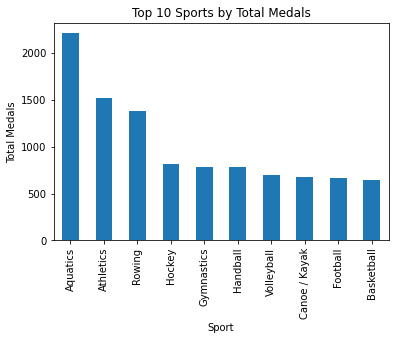

In [37]:
top_10_sports = medals_by_sport.head(10)
top_10_sports.plot(kind='bar', title='Top 10 Sports by Total Medals')
plt.ylabel('Total Medals')
plt.show()

--- Top 10 Events by toal medals---

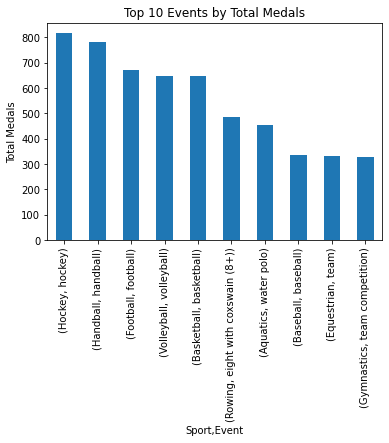

In [38]:
top_10_events = medals_by_event.head(10)
top_10_events.plot(kind='bar', title='Top 10 Events by Total Medals')
plt.ylabel('Total Medals')
plt.show()

--- Medal count of Aquatics sport of each country---

In [39]:
dominant_nations_aquatics = medals_by_sport_country.loc['Aquatics'].sort_values(ascending=False)
dominant_nations_aquatics

Country
United States    578
Australia        239
Russia           125
China            118
East Germany     109
                ... 
Israel             0
Iran               0
Indonesia          0
India              0
Macedonia          0
Name: Aquatics, Length: 127, dtype: int64

---Graphical representation of Aquatics sport of top 10 country---

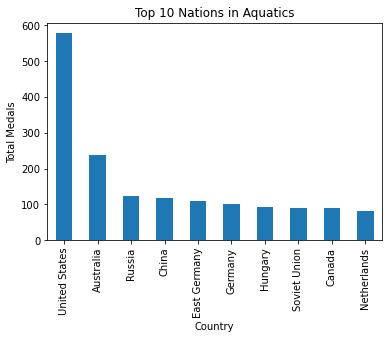

In [40]:
dominant_nations_aquatics.head(10).plot(kind='bar', title='Top 10 Nations in Aquatics')
plt.ylabel('Total Medals')
plt.show()


--- In 1980 Moscow Olympics Athlete count based on country ---

In [41]:
participation_1980 = df[df['Year'] == 1980].groupby('Country')['Athlete'].count()
participation_1980

Country
Australia          12
Austria             5
Belgium             1
Brazil              9
Bulgaria           94
Cuba               20
Czechoslovakia     52
Denmark             8
East Germany      260
Ethiopia            4
Finland             9
France             29
Greece              5
Guyana              1
Hungary            61
India              16
Ireland             3
Italy              37
Jamaica             3
Korea, North        5
Lebanon             1
Mexico             12
Mongolia            4
Netherlands         6
Poland             50
Romania            72
Soviet Union      442
Spain              24
Sweden             18
Switzerland         2
Tanzania            2
Uganda              1
United Kingdom     45
Venezuela           1
Yugoslavia         57
Zimbabwe           16
Name: Athlete, dtype: int64

--- In 1984 Los Angeles Olympics Athlete count based on country ---

In [42]:
participation_1984 = df[df['Year'] == 1984].groupby('Country')['Athlete'].count()
participation_1984

Country
Algeria                 2
Australia              50
Austria                 3
Belgium                 5
Brazil                 37
Cameroon                1
Canada                 86
China                  76
Colombia                1
Cote d'Ivoire           1
Denmark                15
Dominican Republic      1
Egypt                   1
Finland                12
France                 68
Greece                  2
Iceland                 1
Ireland                 1
Italy                  63
Jamaica                 6
Japan                  49
Kenya                   3
Korea, South           42
Mexico                  6
Morocco                 2
Netherlands            40
New Zealand            23
Nigeria                 5
Norway                  4
Pakistan               16
Peru                    1
Portugal                3
Puerto Rico*            2
Romania               106
Spain                  19
Sweden                 32
Switzerland            15
Syria                   1
Taiw

--- In 1980 Moscow Olympics Medal count based on country ---

In [43]:
medals_1980 = df[df['Year'] == 1980].groupby('Country')['Medal'].count()
medals_1980

Country
Australia          12
Austria             5
Belgium             1
Brazil              9
Bulgaria           94
Cuba               20
Czechoslovakia     52
Denmark             8
East Germany      260
Ethiopia            4
Finland             9
France             29
Greece              5
Guyana              1
Hungary            61
India              16
Ireland             3
Italy              37
Jamaica             3
Korea, North        5
Lebanon             1
Mexico             12
Mongolia            4
Netherlands         6
Poland             50
Romania            72
Soviet Union      442
Spain              24
Sweden             18
Switzerland         2
Tanzania            2
Uganda              1
United Kingdom     45
Venezuela           1
Yugoslavia         57
Zimbabwe           16
Name: Medal, dtype: int64

--- In 1984 Los Angeles Olympics Medal counts based on country ---

In [44]:
medals_1984 = df[df['Year'] == 1984].groupby('Country')['Medal'].count()
medals_1984

Country
Algeria                 2
Australia              50
Austria                 3
Belgium                 5
Brazil                 37
Cameroon                1
Canada                 86
China                  76
Colombia                1
Cote d'Ivoire           1
Denmark                15
Dominican Republic      1
Egypt                   1
Finland                12
France                 68
Greece                  2
Iceland                 1
Ireland                 1
Italy                  63
Jamaica                 6
Japan                  49
Kenya                   3
Korea, South           42
Mexico                  6
Morocco                 2
Netherlands            40
New Zealand            23
Nigeria                 5
Norway                  4
Pakistan               16
Peru                    1
Portugal                3
Puerto Rico*            2
Romania               106
Spain                  19
Sweden                 32
Switzerland            15
Syria                   1
Taiw

--- Comparision of 1980 and 1984 Olympics ---

In [45]:
participation_comparison = pd.concat([medals_1980, medals_1984], axis=1, keys=['1980', '1984']).fillna(0)
participation_comparison

,1980,1984
Country,,
Australia,12.0,50.0
Austria,5.0,3.0
Belgium,1.0,5.0
Brazil,9.0,37.0
Bulgaria,94.0,0.0
...,...,...
Thailand,0.0,1.0
Turkey,0.0,3.0
United States,0.0,333.0


--- Graphical representation of comparision of 1980 and 1984 Olympics ---

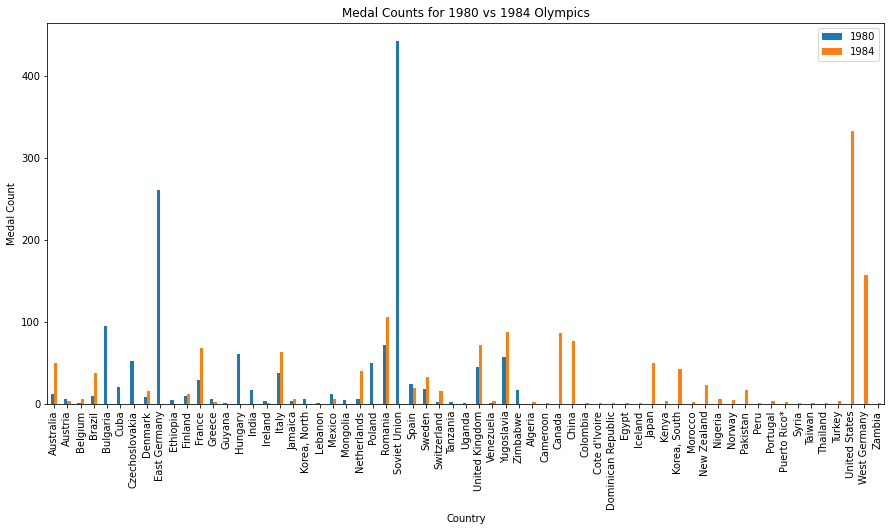

In [46]:
participation_comparison.plot(kind='bar', figsize=(15, 7), title='Medal Counts for 1980 vs 1984 Olympics')
plt.ylabel('Medal Count')
plt.show()